<a href="https://colab.research.google.com/github/ragulnarayanan/Personal_Projects/blob/main/F1_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Formula 1 Constructor Analysis**

This project analyzes Formula 1 constructor performance using historical data from the Kaggle. It provides insights into constructor standings over time and explores seasonal trends in their performance.

**Project Goals**

The main goals of this project are to:


*    Visualize the evolution of constructor standings over the years.
*   Identify dominant constructors and periods of their dominance.
*   Perform seasonal decomposition to understand recurring patterns in constructor performance throughout a season.
*   Gain insights into the factors that influence constructor success.


The project utilizes the following data sources from the Kaggle:
- constructor_results.csv: Contains detailed information about constructor results in each race.
- constructor_standings.csv: Provides constructor standings at the end of each race.
- constructors.csv: Lists all Formula 1 constructors with their respective IDs.
- races.csv: Contains information about each race, including year, round, and circuit.

## Analysis
The analysis is performed using Python libraries such as Pandas, NumPy, Matplotlib, and Statsmodels. It includes the following steps:


1. Data Loading and Preprocessing: The data from CSV files is loaded into Pandas DataFrames and preprocessed for analysis.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
races = pd.read_csv('races.csv')

In [8]:
recent_races = races[(races.year <= 2024) & (races.year >= 2000)].sort_values(by= ['year','round'])

In [9]:
recent_races['order'] = range(len(recent_races))

In [10]:
recent_standings = pd.merge(recent_races, constructor_standings, on ='raceId')

In [11]:
recent_constructors = recent_standings[recent_standings.year == 2024].constructorId.unique()

In [12]:
round1 = recent_standings[recent_standings['round']==1][['order','year']].drop_duplicates()

2. **Constructor Standings Visualization:** A line plot is generated to visualize the cumulative points of different constructors over time, allowing for comparison of their performance.

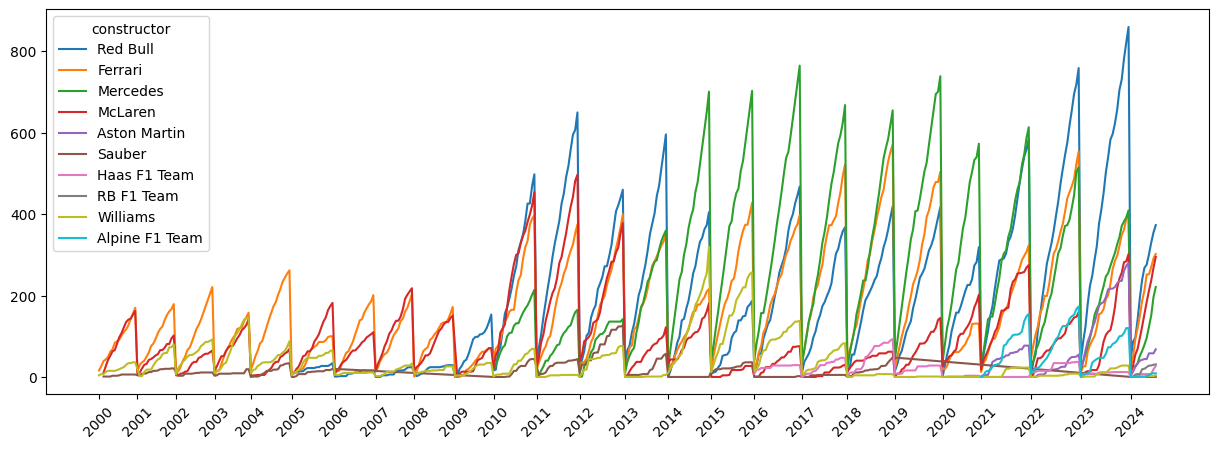

In [13]:
fig, ax = plt.subplots(figsize=(15,5))

for constructor in recent_constructors:
  selected = recent_standings[recent_standings.constructorId == constructor]
  name = constructors[constructors.constructorId == constructor].name.values[0]
  ax.plot(selected.order, selected.points, label =name)

  ax.legend(title = 'constructor')
  plt.xticks(round1['order'],round1['year'],rotation =45)
  fig.show()

3. **Seasonal Decomposition:** Seasonal decomposition is applied to the constructor results data to identify trends, seasonality, and residual components in their performance. This helps to understand recurring patterns throughout a season.

In [14]:
## Seasonal Decomposition

sorted_races = races[(races.year >= 2003) & (races.year <= 2023) & (races['round']<= 16)].sort_values(by=['year','round'])

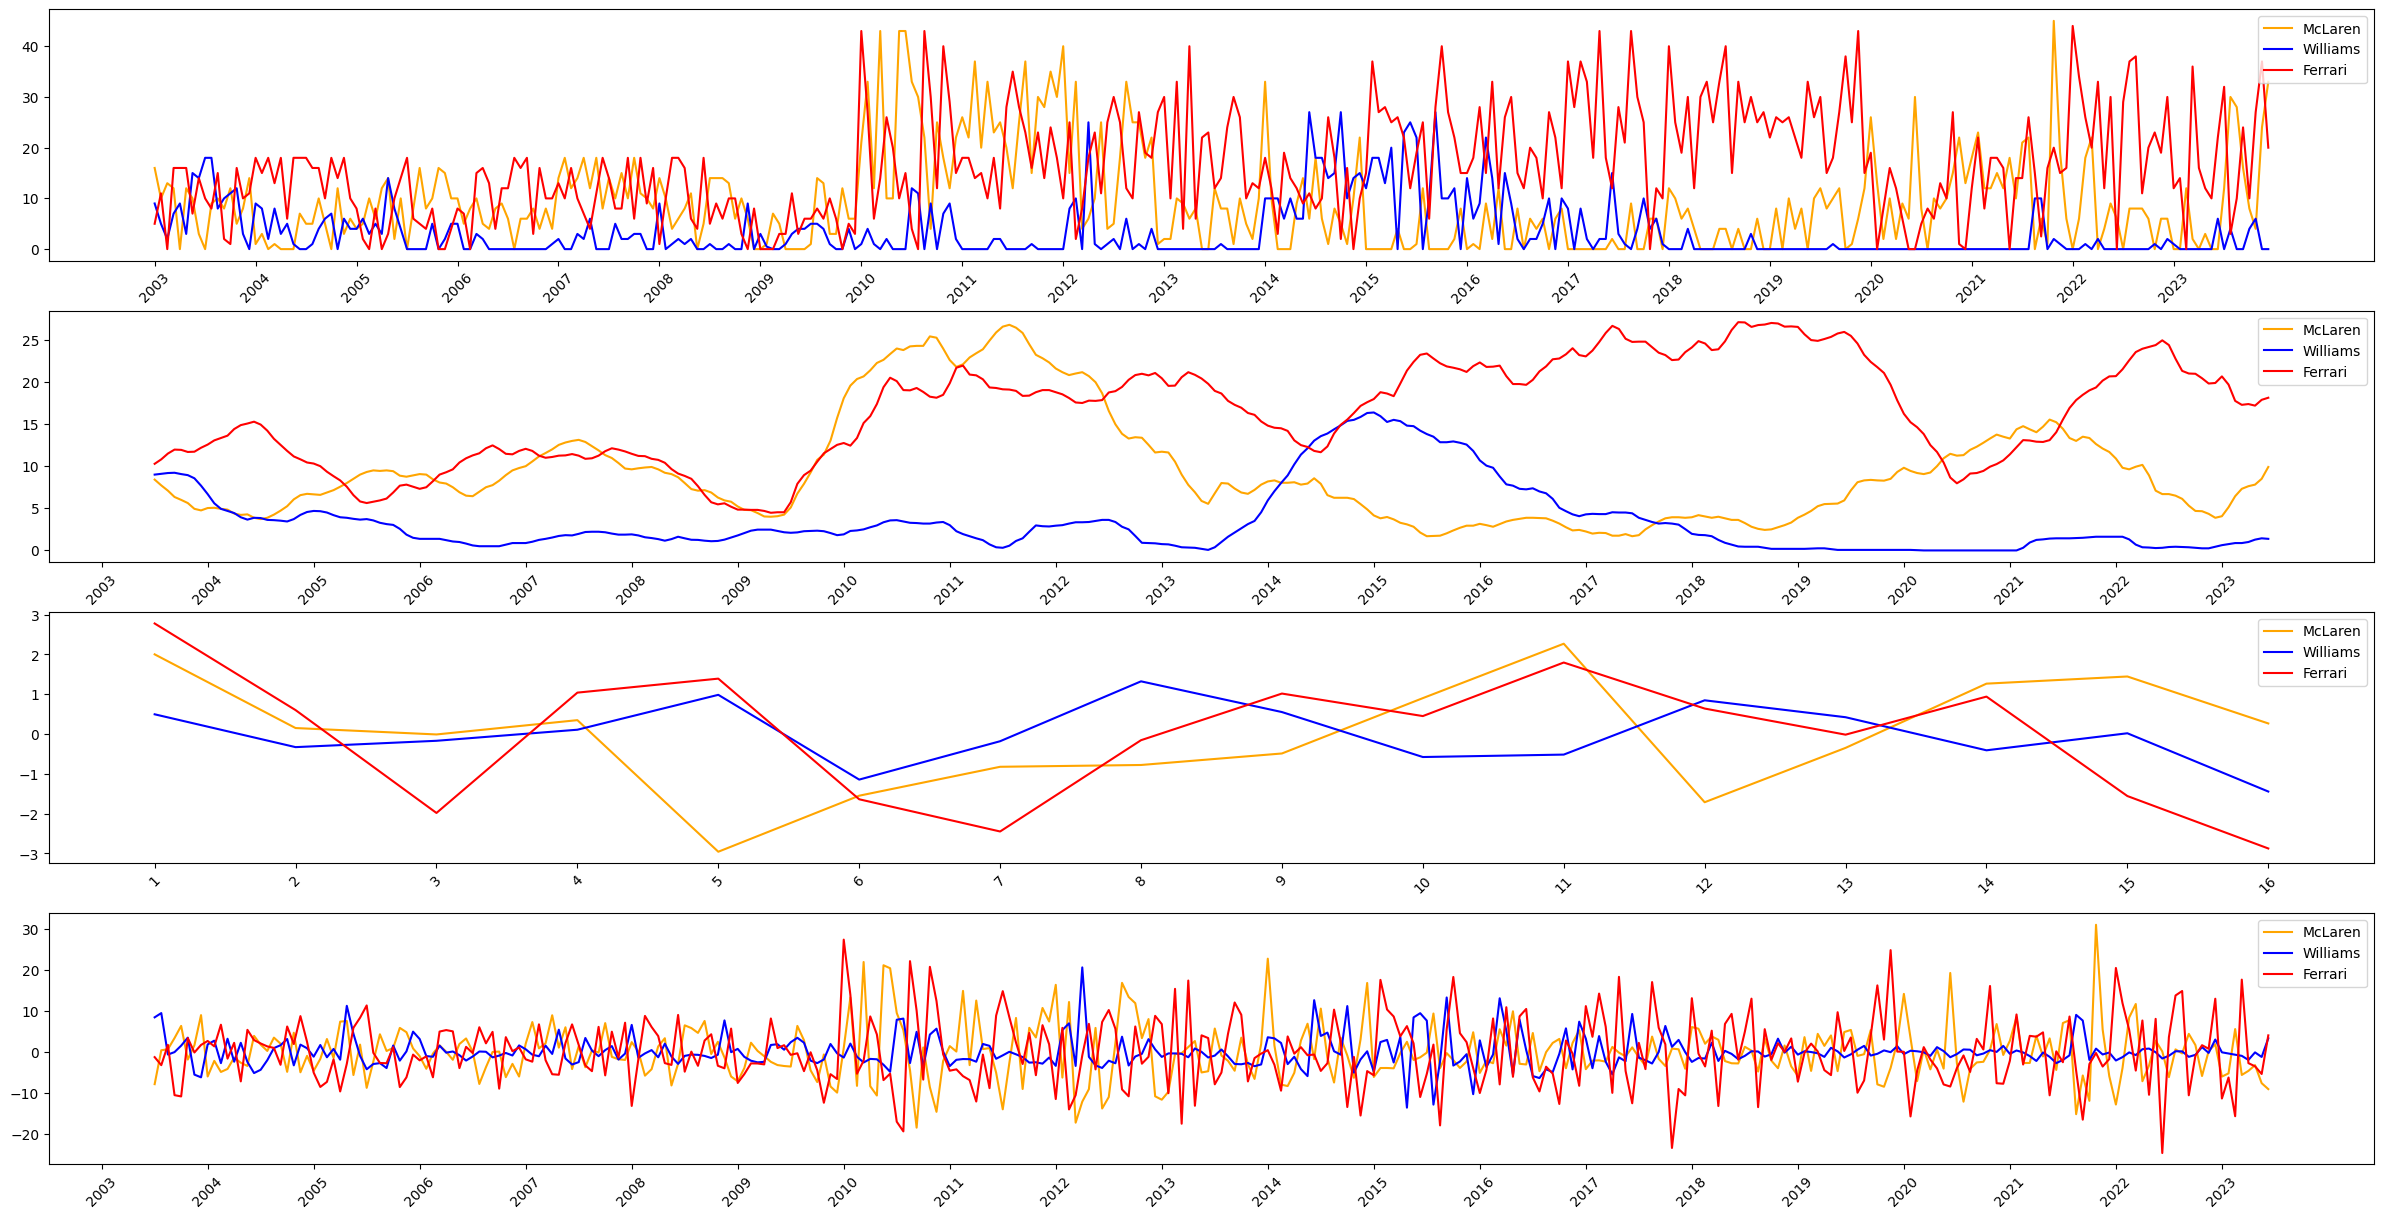

In [15]:
fig, axes = plt.subplots(4, 1, figsize=(30,15))

ids = [1, 3, 6]
colors = ['orange', 'blue', 'red']

for id, color in zip(ids, colors):
  team_standings = constructor_results[constructor_results['constructorId'] == id]
  merged = pd.merge(sorted_races, team_standings)

  result = seasonal_decompose(merged['points'], period = 16)

  components = [result.observed, result.trend, result.seasonal[:16], result.resid]

  label = constructors[constructors.constructorId == id].name.values[0]
  for ax, component in zip(axes, components):
    component.plot(ax=ax, color=color, label=label)

  round1 = merged[merged['round'] == 1]
  for index, ax in enumerate(axes):
    ax.legend(loc='upper right')

    if index == 2:
      ax.set_xticks(range(0,16))
      ax.set_xticklabels(range(1,17), rotation = 45)

    else:
      ax.set_xticks(round1.index)
      ax.set_xticklabels(round1.year, rotation = 45)


plt.show()

## Insights
The analysis reveals several insights about Formula 1 constructor performance:
- Dominant Constructors: Certain constructors have consistently performed well over the years, achieving high standings and accumulating significant points.
- Ferrari's dominance is visible during certain periods, especially in the trend component, where its performance remains higher compared to McLaren and Williams.
McLaren and Williams show declining trends, reflecting possible challenges in maintaining competitiveness.
- Seasonal Trends: Constructor performance often exhibits seasonal patterns, with peaks and troughs during different parts of a season.
-Seasonality indicates external influences, such as specific races or conditions, that teams might target to optimize performance.
-Residual variability highlights the unpredictability in motorsport, emphasizing the importance of minimizing errors and seizing opportunities.
- Impact of Regulations: Changes in regulations and car design can significantly impact constructor performance, leading to shifts in standings.



## Conclusion
This project provides a comprehensive analysis of Formula 1 constructor performance using historical data. By visualizing trends and performing seasonal decomposition, it offers valuable insights into the factors that contribute to constructor success.